## kmean 无监督分类

1、随机选取几个点作为质点

2、根据这几个质点分类：数据样本距离哪个质点进，就分到哪个质点的类

3、根据最新的分类，重新计算质点

4、重复2-3，直至质点不再改变，结束。

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 对<数据集>中的样本进行分类：数据样本距离哪个质点进，就分到哪个质点的类。先求距离再分类。距离用三个columns（ID为distance_from_i）保存；分类结果用一个column（ID为closest）保存。

In [29]:
def assignment(df,centroids,colmap):    
    # 为每个质点创建一个column，用来存储与每个样本点的距离
    # 两点之间的距离：sqrt((x1 - x2)^2 + (y1 - y2)^2)
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(
            np.sqrt(  
            (df['x']-centroids[i][0])**2 + (df['y']-centroids[i][1])**2  
            )
        )
    #用一个list来保存上面新建的三个column ID
    distance_from_centroid_id = ['distance_from_{}'.format(i) for i in centroids.keys()]
    #.idxmin(axis=1)函数是找到label中最小元素，并返回最小元素对应的column ID
    #对上面的20行三列,分别对每行求找最小值，然后记录这个最小值的column ID。
    df['closest'] = df.loc[:,distance_from_centroid_id].idxmin(axis=1)
    #.lstrip():left strip
    df['closest'] = df['closest'].map(lambda x:int(x.lstrip('distance_frome_')))
    df['color'] = df['closest'].map(lambda x:colmap[x]) #colmap = {0:'r',1:'g',2:'b'}
    #print(df)
    return df

#### 根据最新的分类，重新计算质点

In [30]:
def updata(df,centroids):
    #对当前质点的聚类求平均，得到最新的质点
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return centroids

#### main函数，定义数据集（pd.DataFrame），随机选三个点(dict)，然后迭代

In [40]:
def main():
    #用字典定义数据集
    df = pd.DataFrame({
        'x':[12, 20, 28, 18, 10, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72, 23],
        'y':[39, 36, 30, 52, 54, 20, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14,  8, 19,  7, 24, 77]
    })
    #随机选取k个点作为质点,用不同的颜色显示这k个点
    k = 3
    centroids={
        i:[np.random.randint(0,80),np.random.randint(0,80)]
        for i in range(k)
    }
    colmap = {0:'r',1:'g',2:'b'}
    #第一次聚类,并画图显示
    df = assignment(df,centroids,colmap)
    plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
    for i in centroids.keys():
        plt.scatter(*centroids[i],color=colmap[i],linewidths=6)
    plt.xlim(0,80)
    plt.ylim(0,80)
    plt.show()
    #进行迭代
    for i in range(10):
        print(i)
        key = cv2.waitKey()
        plt.close()
        #先保存之前的聚类结果，然后再更新到最新的分类结果，然后计算新的质点
        closest_centroids = df['closest'].copy(deep=True)
        centroids = updata(df,centroids)
        
        plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
        for i in centroids.keys():
            plt.scatter(*centroids[i],color=colmap[i],linewidth=6)
        plt.xlim(0,80)
        plt.ylim(0,80)
        plt.show()
        #再一次聚类，跟保存的聚类结果进行比较
        df = assignment(df,centroids,colmap)
        if closest_centroids.equals(df['closest']):
            break
        

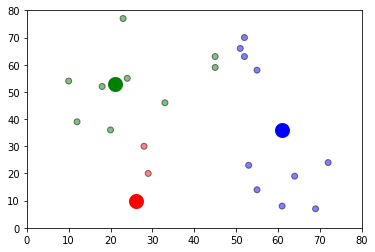

0


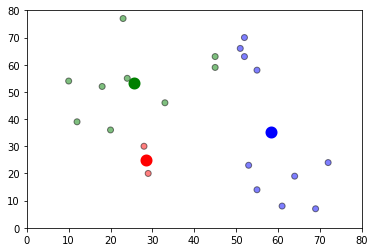

1


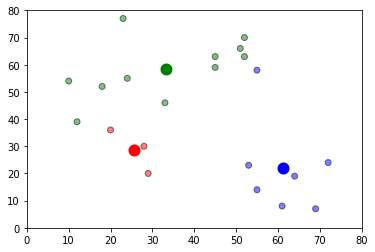

2


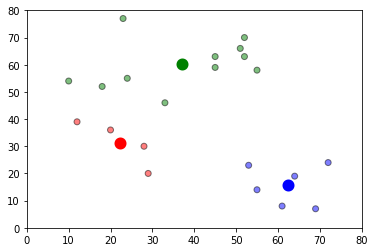

3


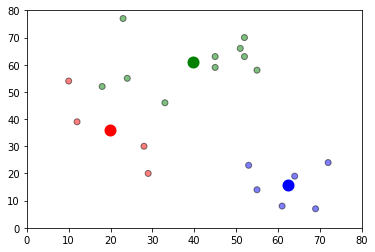

4


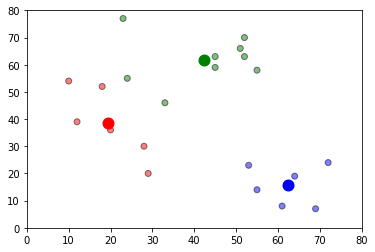

5


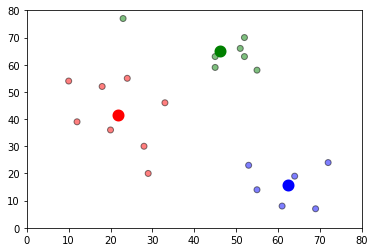

In [41]:
if __name__ == '__main__':
    main()

In [7]:
a={0:'r',1:'g',2:'b'}
print(a.keys())

dict_keys([0, 1, 2])
